In [1]:
train_df <- read.csv("../Data//Titanic_train.csv")
head(train_df)



癤풮assengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [2]:
tail(train_df)

,癤풮assengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [3]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ 癤풮assengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived      : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass        : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name          : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex           : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age           : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp         : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch         : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket        : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare          : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin         : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked      : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


### 컬럼 내용 확인
- Survived : 생존여부, 0=사망, 1=생존
- Pclass : 티켓등급, 1=1등급, 2=2등급, 3=3등급
- Sibsp : 함께 탑승한 형제, 자매, 배우자의 수
- Parch : 함께 탑승한 부모, 자식의 수
- Fare : 운임 
- Cabin : 객실번호
- Embarked : 탑승항구, C=Chersbourg, Q=Queenstown, S=Southampton

In [4]:
# 각 컬럼별 NA 확인
sum(is.na(train_df))
colSums(is.na(train_df)) # 컬럼별 합계

[1] 177

癤풮assengerId       Survived         Pclass           Name            Sex 
             0              0              0              0              0 
           Age          SibSp          Parch         Ticket           Fare 
           177              0              0              0              0 
         Cabin       Embarked 
             0              0

In [5]:
177/891 # na 30% 이하이므로 사용가치 있음

[1] 0.1986532

In [6]:
# train_df$Age가 NA인 것 빼고 데이터셋 만들기

head(subset(train_df, Age != 'NA'))
nrow(subset(train_df, Age != 'NA'))

,癤풮assengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


[1] 714

In [7]:
# Survived 기준으로 Dataset 정렬

library(dplyr)

table(train_df$Survived)

train_df <- arrange(train_df, Survived)

print(head(train_df))


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




  0   1 
549 342 

  癤풮assengerId Survived Pclass                           Name  Sex Age SibSp
1              1        0      3        Braund, Mr. Owen Harris male  22     1
2              5        0      3       Allen, Mr. William Henry male  35     0
3              6        0      3               Moran, Mr. James male  NA     0
4              7        0      1        McCarthy, Mr. Timothy J male  54     0
5              8        0      3 Palsson, Master. Gosta Leonard male   2     3
6             13        0      3 Saundercock, Mr. William Henry male  20     0
  Parch    Ticket    Fare Cabin Embarked
1     0 A/5 21171  7.2500              S
2     0    373450  8.0500              S
3     0    330877  8.4583              Q
4     0     17463 51.8625   E46        S
5     1    349909 21.0750              S
6     0 A/5. 2151  8.0500              S


In [8]:
tail(train_df)

,癤풮assengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [9]:
# 정렬된 크기 확인하기
dim(train_df)

[1] 891  12

---
# Target Column : Survived 분석 및 확인

In [10]:
table(train_df$Survived)


  0   1 
549 342 

In [11]:
# Survived의 생존과 사망 Count 확인 및 비율 계산하기


# 사망자수
dCount <- nrow(subset(train_df, Survived == 0))
# 생존자수
sCount <- nrow(subset(train_df, Survived == 1))
# 생존자수의 비율 
s <- round(nrow(subset(train_df, Survived == 1)) / nrow(train_df)*100,2)
# 사망자수의 비율
d <- round(nrow(subset(train_df, Survived == 0)) / nrow(train_df)*100,2)
surDie <- data.frame(사망=d, 생존=s)
t(surDie)


사망,61.62
생존,38.38


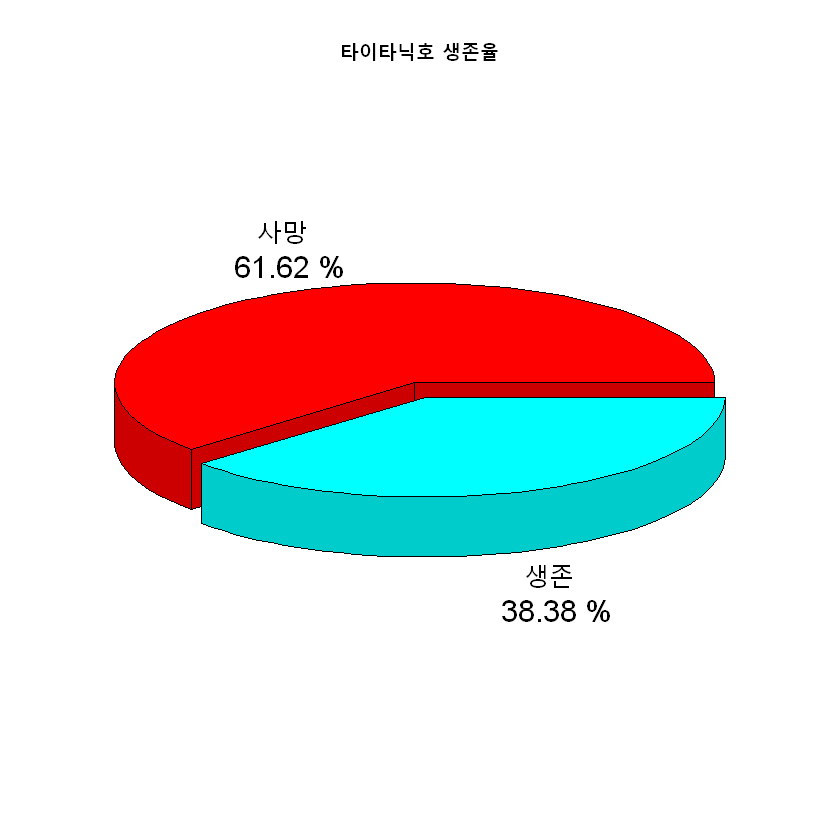

In [12]:
library(plotrix)

par(family = "AppleGothic")
options(warn = -1)
pie3D(
   t(surDie),
    main = "타이타닉호 생존율",
    labels = paste(colnames(surDie), "\n" ,surDie, "%"),
    explod = 0.05
)

In [13]:
sdCount <- data.frame(사망=dCount, 생존=sCount)
sdCount

사망,생존
549,342


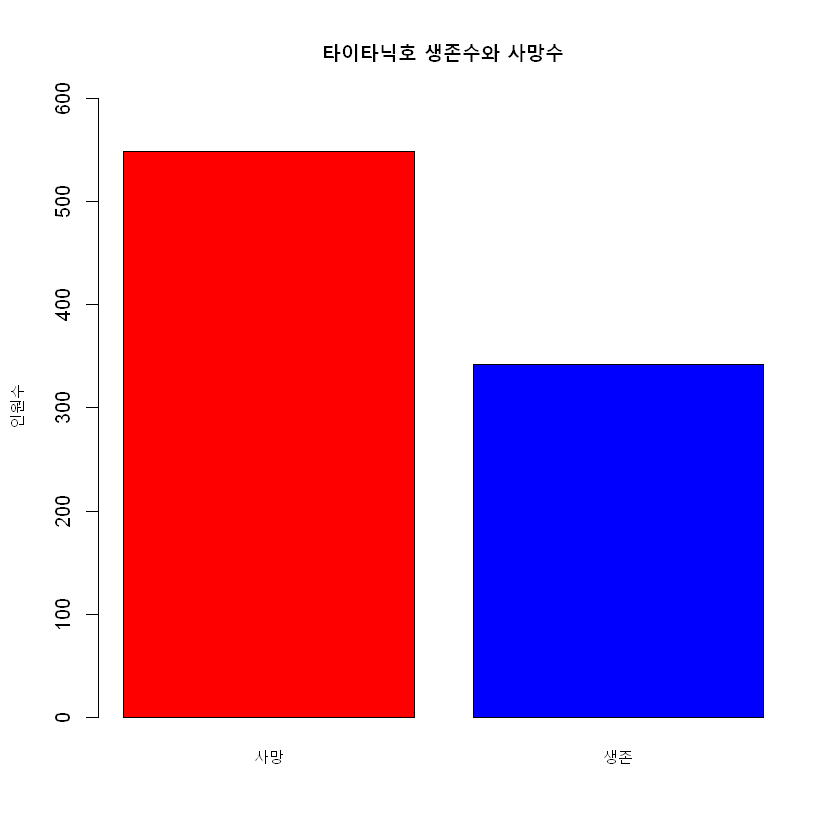

In [14]:
par(family = "AppleGothic")
options(warn = -1)

barplot(
    t(sdCount),
    main = "타이타닉호 생존수와 사망수",
    beside = T,
    ylim = c(0, 600),
    col = c('red', 'blue'),
    space = 0.2,
    ylab = '인원수',
    names = colnames(sdCount)
    
)

> Target Column으로 Survived를 선정

---
# Feature column 찾기

In [15]:
head(train_df)

癤풮assengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


# Sex컬럼 확인

In [16]:
# Sex컬럼 분류 확안
unique(train_df$Sex)

[1] male   female
Levels: female male

In [17]:
# 여성과 남성의 인원 확인
femaleCount <- nrow(subset(train_df, Sex == 'female'))
maleCount <- nrow(subset(train_df, Sex == 'male'))

femaleCount
maleCount

[1] 314

[1] 577

In [18]:
# 여성의 생존수와 사망수
female <- subset(train_df, Sex == 'female')

femaleDie <- nrow(subset(female, Survived == 0))
femaleSur <- nrow(subset(female, Survived == 1))

femaleSur
femaleDie

[1] 233

[1] 81

In [19]:
# 남성의 생존수와 사망수
male <- subset(train_df, Sex == 'male');

maleDie <- nrow(subset(male, Survived == 0))
maleSur <- nrow(subset(male, Survived == 1))

maleSur
maleDie

[1] 109

[1] 468

In [20]:
# 남성의 생존율과 사망율

cat("남성의 생존율 : ", round(maleSur/nrow(male)*100,2), "\n")
cat("남성의 사망율 : ", round(maleDie/nrow(male)*100,2))

남성의 생존율 :  18.89 
남성의 사망율 :  81.11

In [21]:
# 여성의 생존율과 사망율

cat("여성의 생존율 : ", round(femaleSur/nrow(female)*100,2), "\n")
cat("여성의 사망율 : ", round(femaleDie/nrow(female)*100,2))

여성의 생존율 :  74.2 
여성의 사망율 :  25.8

> Sex 컬럼은 Feature로 적합 <br>
> [Survived] <- [sex]

In [22]:
# 남성 생존율
male <- data.frame(사망=round(maleDie/nrow(male)*100,2) , 생존=round(maleSur/nrow(male)*100,2)); male

사망,생존
81.11,18.89


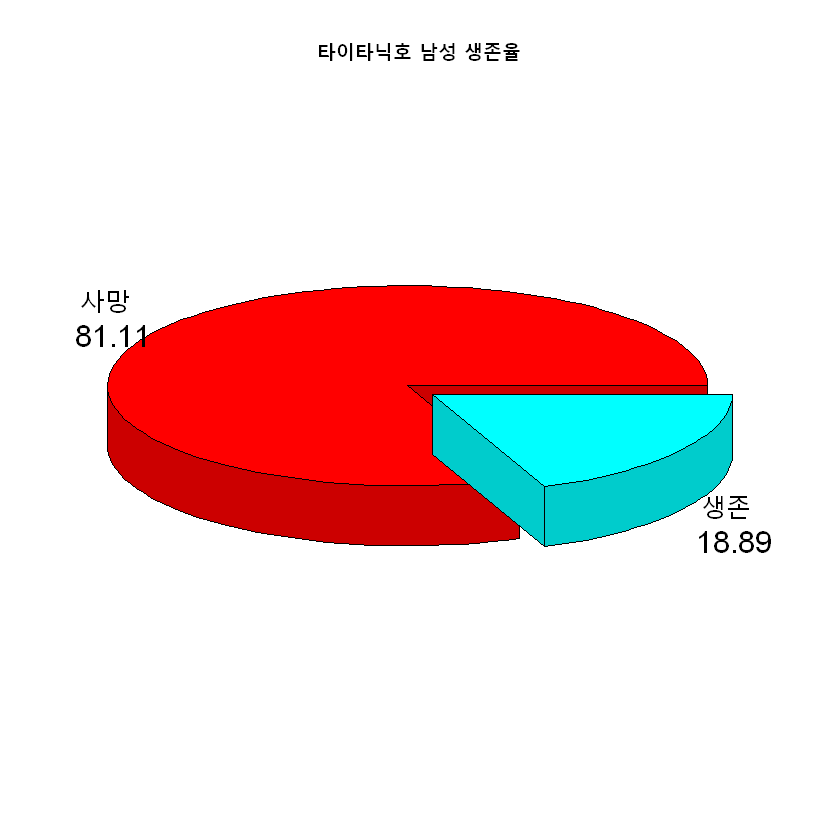

In [23]:
par(family = "AppleGothic")

pie3D(
    t(male),
    main = "타이타닉호 남성 생존율",
    explode = 0.05,
    labels = paste(colnames(male), "\n", male)
)

In [24]:
# 여성 생존율
female <- data.frame(사망=round(femaleDie/nrow(female)*100,2) , 생존=round(femaleSur/nrow(female)*100,2)); female

사망,생존
25.8,74.2


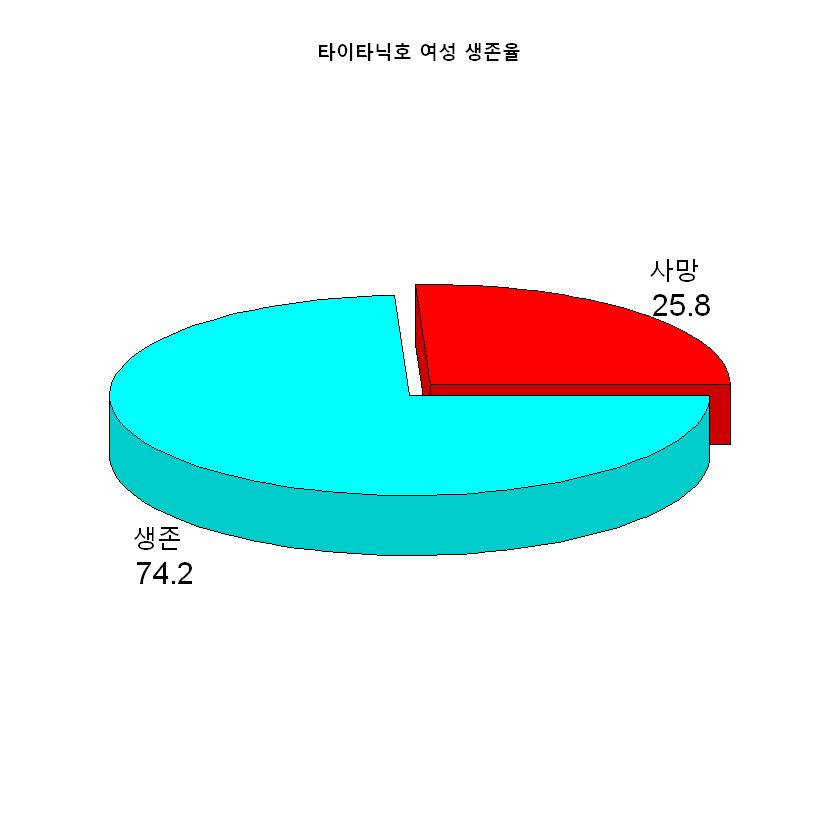

In [25]:
par(family = "AppleGothic")

pie3D(
    t(female),
    main = "타이타닉호 여성 생존율",
    explode = 0.05,
    labels = paste(colnames(female), "\n", female)
)


female   male 
   314    577 

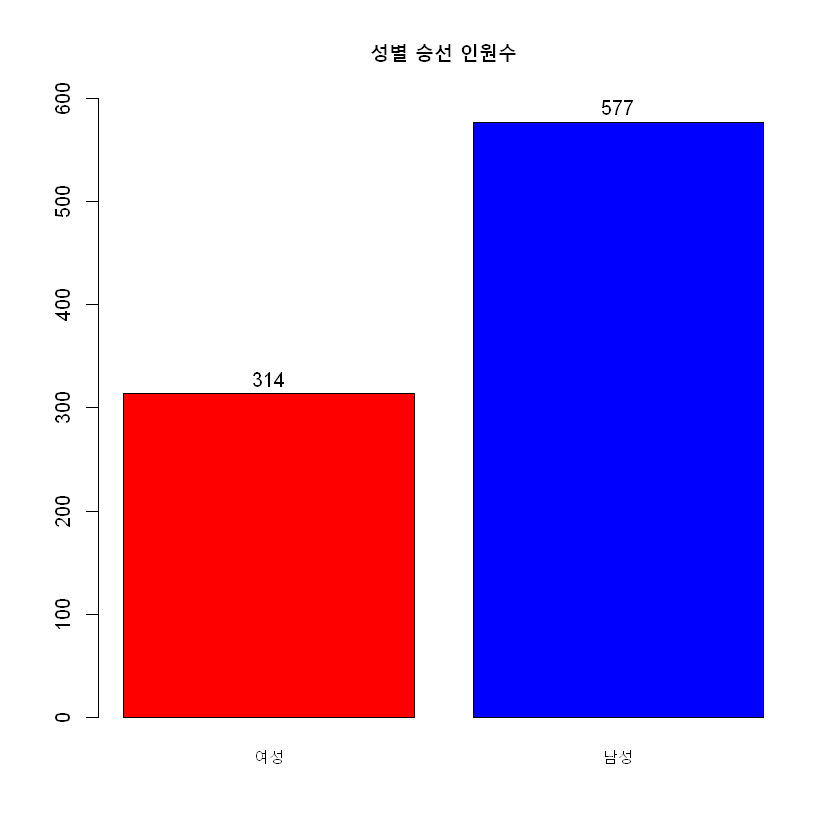

In [26]:
# 성별 승선 인원수

table(train_df$Sex)

par(family = "AppleGothic")

barplot(
        table(train_df$Sex),
        main = "성별 승선 인원수",
        col = c('red', 'blue'),
        ylim = c(0, 600),
        names = c('여성', '남성')
        
)

text(0.7, sum(train_df$Sex=="female")+15, sum(train_df$Sex=="female"))
text(0.7+1.2, sum(train_df$Sex=="male")+15, sum(train_df$Sex=="male"))

# 글자 쓰기 text(x축, y축, 내용, str = 기울기)


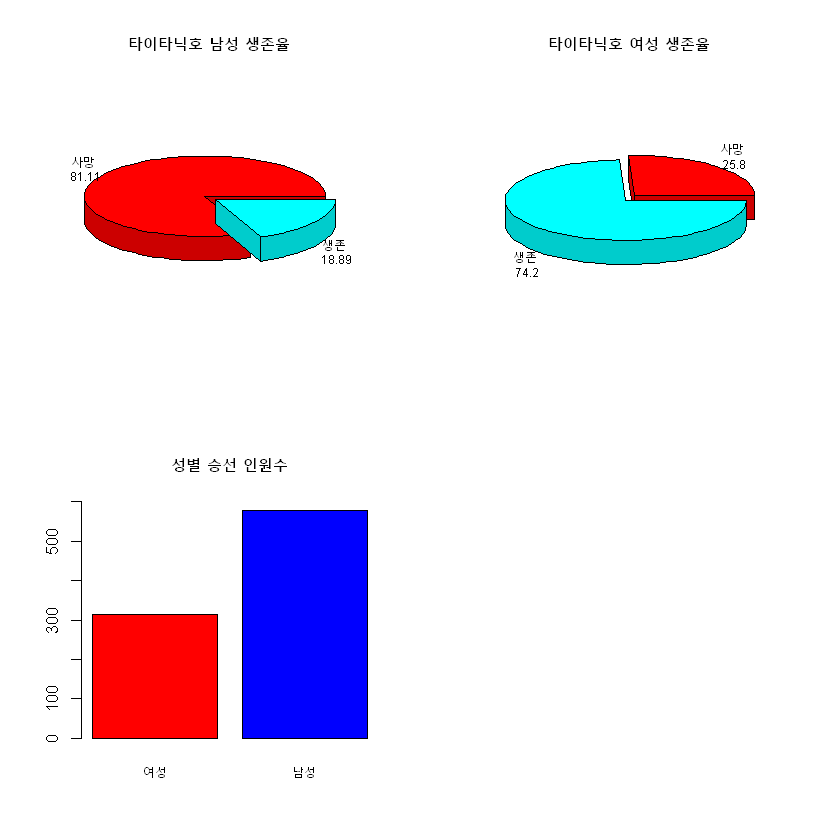

In [27]:
par(family = "AppleGothic")
par(mfrow = c(2,2))
pie3D(
    t(male),
    main = "타이타닉호 남성 생존율",
    explode = 0.05,
    labels = paste(colnames(male), "\n", male),
    labelcex = 0.6
)
pie3D(
    t(female),
    main = "타이타닉호 여성 생존율",
    explode = 0.05,
    labels = paste(colnames(female), "\n", female),
    labelcex = 0.6
)
barplot(
        table(train_df$Sex),
        main = "성별 승선 인원수",
        col = c('red', 'blue'),
        ylim = c(0, 600),
        labelcex = 0.6,
        names = c('여성', '남성')
        
)


In [28]:
head(train_df)

癤풮assengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


---
### 티켓 등급 분석

In [29]:
table(train_df$Pclass)


  1   2   3 
216 184 491 

In [30]:
# 1등 객실의 여성 생존율

women <- nrow(subset(train_df, Pclass == 1 & Sex == "female"))
wSur <- nrow(subset(train_df, Pclass == 1 & Sex == "female"& Survived == 1))

cat("1등 객실의 여성 생존율은", wSur, "/", women, ",", round(wSur/women*100,2), "%")

1등 객실의 여성 생존율은 91 / 94 , 96.81 %

In [31]:
# 1~3등 객실의 여성 생존율

for(i in 1:3){
    women <- nrow(subset(train_df, Pclass == i & Sex == "female"))
    wSur <- nrow(subset(train_df, Pclass == i & Sex == "female"& Survived == 1))

    cat(i, "등 객실의 여성 생존율은", wSur, "/", women, ",", round(wSur/women*100,2), "%", "\n")
    
}

1 등 객실의 여성 생존율은 91 / 94 , 96.81 % 
2 등 객실의 여성 생존율은 70 / 76 , 92.11 % 
3 등 객실의 여성 생존율은 72 / 144 , 50 % 


In [32]:
# 1~3등 객실의 여성,남성 생존율
sex <- c('female', 'male')
sex2 <- c('여성', '남성')

surFemale <- rep(0,0,3)
surMale <- rep(0,0,3)

for(j in 1:length(sex)){
    for(i in 1:3){
        
        maleFemale <- nrow(subset(train_df, Pclass == i & Sex == sex[j]))
        survived <- nrow(subset(train_df, Pclass == i & Sex == sex[j]& Survived == 1))
        perSur <- round(survived/maleFemale*100,2)
        
        cat(i, "등 객실의", sex2[j],"생존율은", survived, "/", maleFemale, ",", perSur, "%", "\n")
        
        ifelse(j == 1,
               surFemale[i] <- surFemale[i] + perSur, surMale[i] <- surMale[i] + perSur)
    }
   cat("------------------------------------", "\n")
}

1 등 객실의 여성 생존율은 91 / 94 , 96.81 % 
2 등 객실의 여성 생존율은 70 / 76 , 92.11 % 
3 등 객실의 여성 생존율은 72 / 144 , 50 % 
------------------------------------ 
1 등 객실의 남성 생존율은 45 / 122 , 36.89 % 
2 등 객실의 남성 생존율은 17 / 108 , 15.74 % 
3 등 객실의 남성 생존율은 47 / 347 , 13.54 % 
------------------------------------ 


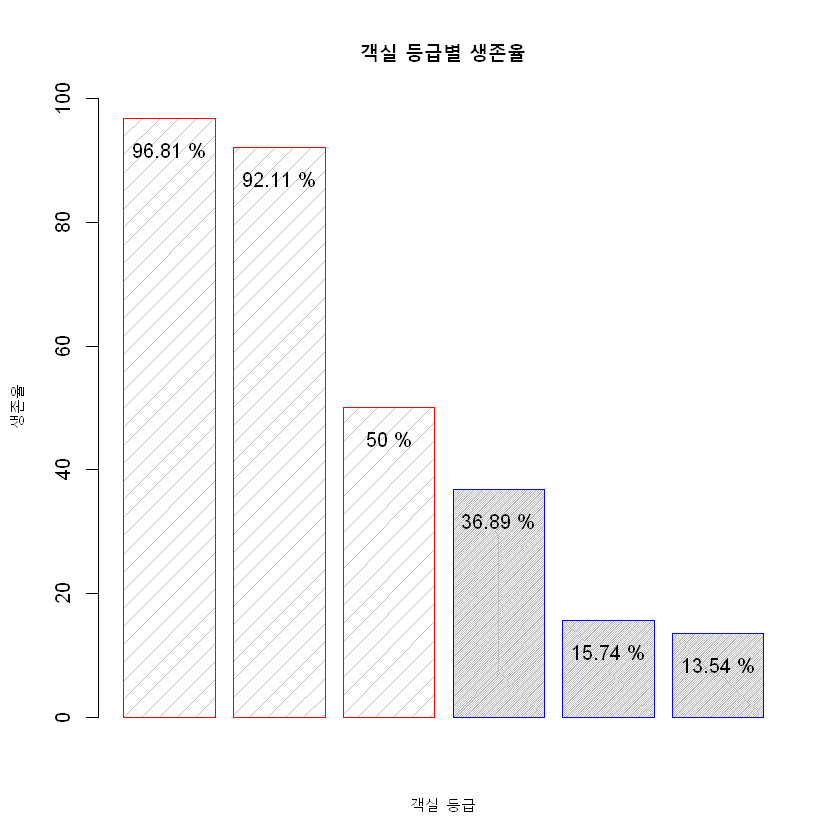

In [33]:
# 남녀 생존률 합치기
sur <- c(surFemale, surMale)



par(family = "AppleGothic")

barplot(
    sur,
    main = "객실 등급별 생존율",
    ylim= c(0, 100),
    xlab = "객실 등급",
    ylab = "생존율",
    border = c(rep('red',3),rep('blue',3)),
    density = c(rep(10,3),rep(100,3))
)

for(i in 0:5){
    text(i*1.2+0.7, sur[i+1]-5, paste(sur[i+1],"%"))
}

> [Survived] <- [Sex, Pclass]

---
### Embarked(항구의 위치)

In [34]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ 癤풮assengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass        : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name          : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex           : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age           : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp         : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch         : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket        : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare          : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin         : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked      : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


In [35]:
table(train_df$Embarked)


      C   Q   S 
  2 168  77 644 

In [36]:
# 빈 칸의 데이터 찾기
unique(train_df$Embarked)

subset(train_df, Embarked=="")

[1] S Q C  
Levels:  C Q S

,癤풮assengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [37]:
# 제일 많은 운임을 지불한 사람

head(arrange(train_df, desc(Fare)),5)

癤풮assengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C
28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0000,C23 C25 C27,S
439,0,1,"Fortune, Mr. Mark",male,64,1,4,19950,263.0000,C23 C25 C27,S


In [38]:
mean(train_df$Fare)

[1] 32.20421

In [39]:
# 항구별 탑승인원을 구하여 가장 많은 탑승인원의 항구로 결정

# S항구 탑승인원
sum(train_df$Embarked == 'S')
# C항구 탑승인원
sum(train_df$Embarked == 'C')
# Q항구 탑승인원
sum(train_df$Embarked == 'Q')

[1] 644

[1] 168

[1] 77

In [40]:
# 연습을 위한 데이터셋 복제
train_df_T <- train_df

In [41]:
# 빈칸 항구 찾기 - 1
subset(train_df, Embarked=="")

,癤풮assengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [42]:
# 빈칸 항구를 S항구로 변경 -1

train_df_T$Embarked <- ifelse(train_df_T$Embarked == "", 'S', train_df_T$Embarked)

In [43]:
subset(train_df_T, Embarked=="")

癤풮assengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [44]:
# 빈칸 항구를 S항구로 변경 -2
train_df_T <- train_df

In [45]:
subset(train_df_T, Embarked=="")

,癤풮assengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [46]:
train_df_T[train_df_T$Embarked == "", ]$Embarked <- "S"

In [47]:
# 빈칸 항구를 S항구로 변경 -3
train_df_T <- train_df

In [48]:
train_df_T$Embarked[train_df_T$Embarked == ""] <- "S"

---

In [49]:
train_df$Embarked[train_df$Embarked == ""] <- "S"

In [50]:
sum(train_df$Embarked == 'S')

[1] 646

In [51]:
train_df$Embarked <- factor(train_df$Embarked)
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ 癤풮assengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass        : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name          : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex           : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age           : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp         : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch         : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket        : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare          : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin         : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked      : Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...


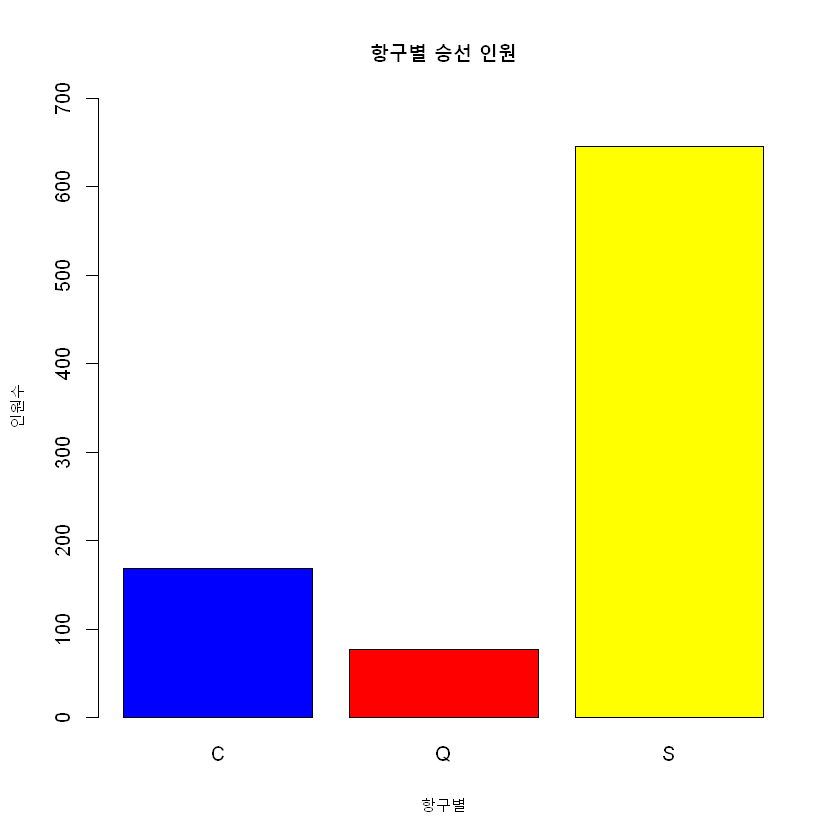

In [52]:
# 항구별 승선 인원

par(family = "AppleGothic")

barplot(
        table(train_df$Embarked),
        main = "항구별 승선 인원",
        xlab = "항구별",
        ylab = "인원수",
        ylim = c(0, 700),
        col = c('blue', 'red', 'yellow')
    
)



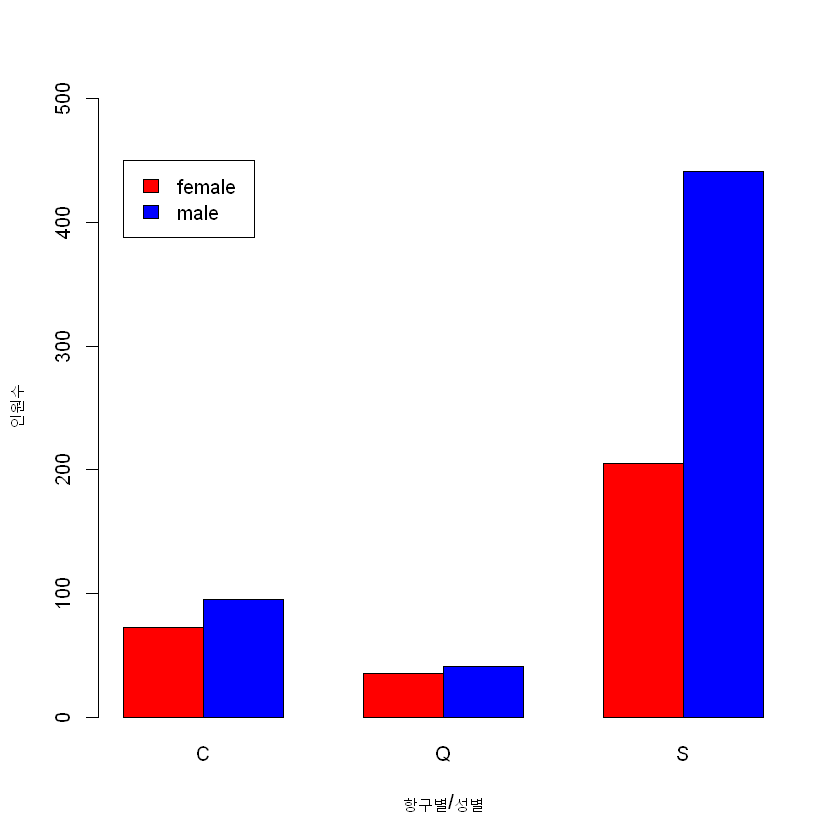

In [53]:
# 항구별 성별 승선 인원

par(family = "AppleGothic")

barplot(
    table(train_df$Sex, train_df$Embarked),
    beside= T,
    ylim = c(0, 500),
    ylab = "인원수",
    xlab = "항구별/성별",
    col = c('red','blue')
    
    )

legend(
        1,450,
        c('female', 'male'),
        fill = c('red', 'blue')

)

> s 값이 너무 많아서 s의 특징에 따라 다른 항구에도 영향을 미칠 수 있음 

   
      C   Q   S
  0  75  47 427
  1  93  30 219

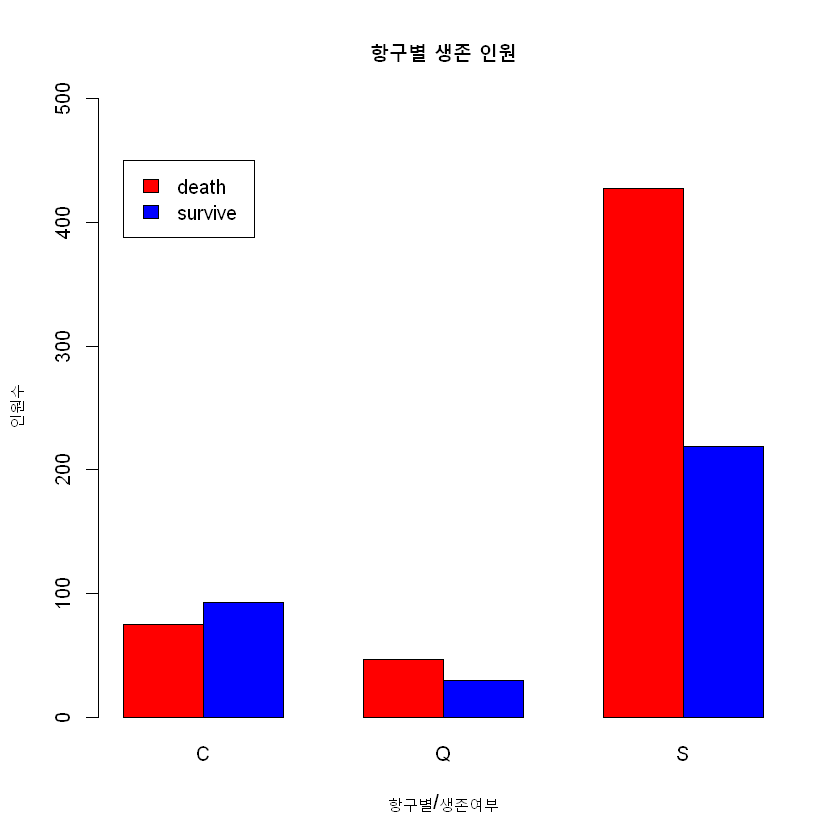

In [54]:
# 항구별 승선 인원
# 항구별 생존 인원

table(train_df$Survived, train_df$Embarked)

par(family = "AppleGothic")

barplot(
    table(train_df$Survived, train_df$Embarked),
    beside= T,
    main = '항구별 생존 인원',
    ylim = c(0, 500),
    ylab = "인원수",
    xlab = "항구별/생존여부",
    col = c('red','blue')
    
    )

legend(
        1,450,
        c('death', 'survive'),
        fill = c('red', 'blue')

)

   
      C   Q   S
  1  85   2 129
  2  17   3 164
  3  66  72 353

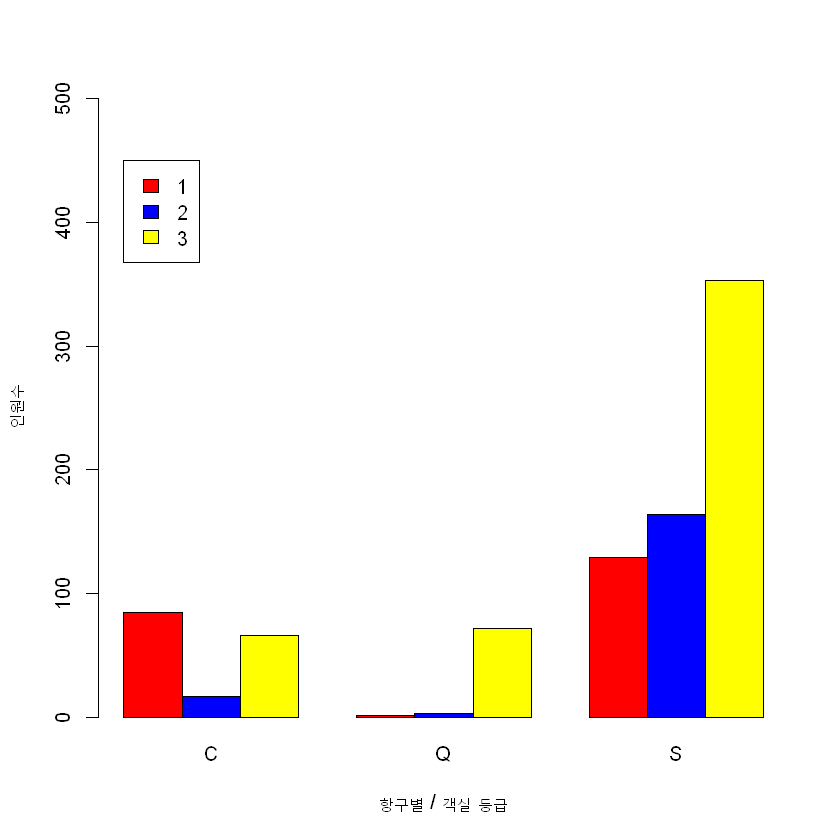

In [55]:
# 항구별 객실 등급별 인원

table(train_df$Pclass, train_df$Embarked)

par(family = "AppleGothic")

barplot(
    table(train_df$Pclass, train_df$Embarked),
    beside = T,
    ylim = c(0, 500),
    ylab = "인원수",
    xlab = "항구별 / 객실 등급",
    col = c('red', 'blue', 'yellow'),
    
)

legend(
        1,450,
        c(1:3),
        fill = c('red', 'blue', 'yellow')
)

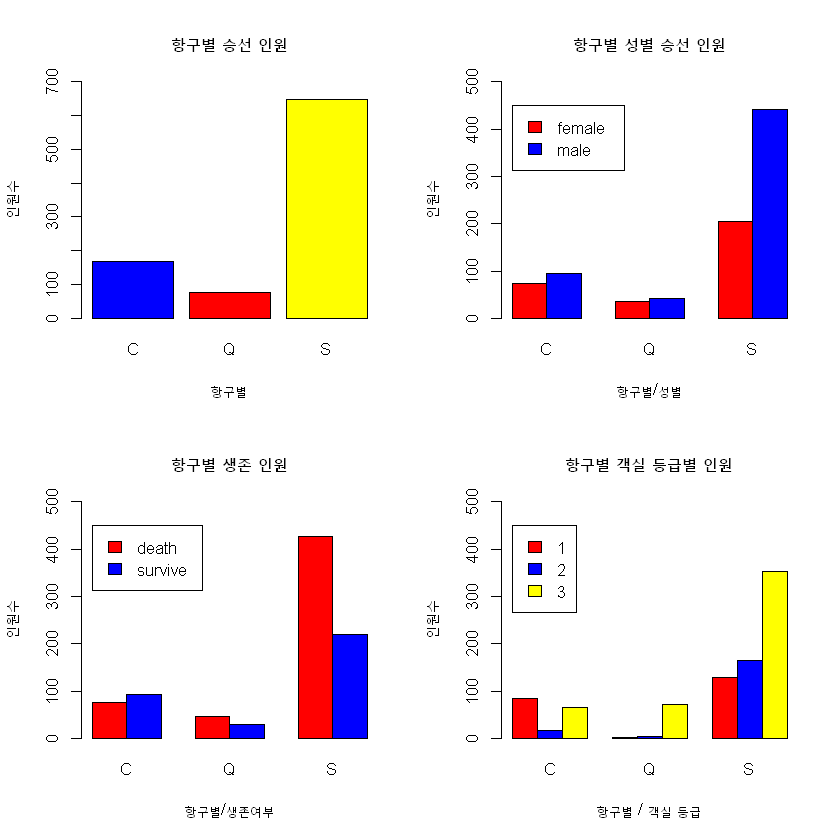

In [56]:
par(family = "AppleGothic")
par(mfrow = c(2,2))

barplot(
        table(train_df$Embarked),
        main = "항구별 승선 인원",
        xlab = "항구별",
        ylab = "인원수",
        ylim = c(0, 700),
        col = c('blue', 'red', 'yellow')
    
)

barplot(
    table(train_df$Sex, train_df$Embarked),
    main = "항구별 성별 승선 인원",
    beside= T,
    ylim = c(0, 500),
    ylab = "인원수",
    xlab = "항구별/성별",
    col = c('red','blue')
    
    )
legend(
        1,450,
        c('female', 'male'),
        fill = c('red', 'blue')

)

barplot(
    table(train_df$Survived, train_df$Embarked),
    beside= T,
    main = '항구별 생존 인원',
    ylim = c(0, 500),
    ylab = "인원수",
    xlab = "항구별/생존여부",
    col = c('red','blue')
    
    )
legend(
        1,450,
        c('death', 'survive'),
        fill = c('red', 'blue')

)

barplot(
    table(train_df$Pclass, train_df$Embarked),
    main = "항구별 객실 등급별 인원",
    beside = T,
    ylim = c(0, 500),
    ylab = "인원수",
    xlab = "항구별 / 객실 등급",
    col = c('red', 'blue', 'yellow'),
    
)
legend(
        1,450,
        c(1:3),
        fill = c('red', 'blue', 'yellow')
)

---
# RandomForest로 예측모델 생성

In [57]:
# 복사본
train_df_T <- train_df

In [58]:
# 예측을 위한 컬럼 확인
target_col <- c("Survived", "Sex", "Pclass", "Embarked")
head(train_df_T[,target_col])

Survived,Sex,Pclass,Embarked
0,male,3,S
0,male,3,S
0,male,3,Q
0,male,1,S
0,male,3,S
0,male,3,S


In [59]:
# Sex 컬럼을 숫자로 전환
train_df_T$SexCode[train_df_T$Sex == "male"] <- 0
train_df_T$SexCode[train_df_T$Sex == "female"] <- 1

In [60]:
head(train_df_T)
tail(train_df_T)

癤풮assengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S,0


,癤풮assengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C,1
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C,1
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C,1
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S,1
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,0


In [61]:
# Sex컬럼 삭제
train_df_T <- subset(train_df_T, select = -Sex)
head(train_df_T)

癤풮assengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",20,0,0,A/5. 2151,8.0500,,S,0


In [62]:
target_col <- c("Survived", "SexCode", "Pclass", "Embarked")
head(train_df_T[target_col])

Survived,SexCode,Pclass,Embarked
0,0,3,S
0,0,3,S
0,0,3,Q
0,0,1,S
0,0,3,S
0,0,3,S


# Embarked를 숫자로 변환
C = 0, S = 1, Q = 2 -> 맞긴 맞지만 좋은 생각이 아니다.
2 * S = Q ? <br>
S + S = Q ? <br>

### One-HOt Encoding방법
C == [1,0,0] <br>
S == [0,1,0] <br>
Q == [0,0,1] <br>
처럼 행렬로 만들면 덧셈과 뺄셈에 대해 각 계산이 매우 안전해 진다.
R은 내부적으로 1은 True, 0은 False.

In [63]:
train_df_T$Embarked_C = train_df_T$Embarked == 'C'
train_df_T$Embarked_S = train_df_T$Embarked == 'S'
train_df_T$Embarked_Q = train_df_T$Embarked == 'Q'

head(train_df_T[c('Embarked', 'Embarked_C', 'Embarked_S', 'Embarked_Q')])

Embarked,Embarked_C,Embarked_S,Embarked_Q
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
Q,FALSE,FALSE,TRUE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE


In [64]:
target_col = c("Survived", "Pclass", "SexCode", 
               "Embarked_C", "Embarked_S", "Embarked_Q")

head(train_df_T[,target_col])

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [65]:
train_data <- train_df_T[,target_col]

In [66]:
head(train_data)

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [67]:
str(train_data)

'data.frame':	891 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 1 3 3 3 3 3 3 ...
 $ SexCode   : num  0 0 0 0 0 0 0 1 0 1 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...


In [68]:
# Sampling
library(randomForest)
library(caret)

set.seed(1234)

samp <- createDataPartition(train_data$Survived, p=0.7, list=F)
head(samp)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



Resample1
1
2
3
4
10
11


In [69]:
# 학습용

data.train <- train_data[samp,]
str(data.train)

'data.frame':	624 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 1 3 2 3 3 1 3 ...
 $ SexCode   : num  0 0 0 0 1 0 1 0 0 0 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...


In [70]:
# 검증용

data.test <- train_data[-samp,]
str(data.test)

'data.frame':	267 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 3 3 1 1 3 3 3 ...
 $ SexCode   : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ Embarked_S: logi  TRUE TRUE TRUE TRUE FALSE FALSE ...
 $ Embarked_Q: logi  FALSE FALSE FALSE FALSE TRUE FALSE ...


In [71]:
# 학습시키기

rf <- randomForest(Survived ~ ., data=data.train, ntree=100)

In [72]:
# 문제와 정답
x <- subset(data.test, select = -Survived)
y <- data.test$Survived

In [73]:
# 검증하기
pred <- predict(rf, x)
head(pred)

5         6         7         8         9        16 
0.2142584 0.2142584 0.2142584 0.3813423 0.2311170 0.4489231

In [74]:
pred[pred <= 0.5] <- 0
pred[pred >= 0.5] <- 1

In [75]:
mean(pred == y)

[1] 0.7790262

---
### Survived를 factor로 변환후에 randomForest 실행


In [76]:
data.train$Survived <- as.factor(data.train$Survived)
data.test$Survived <- as.factor(data.test$Survived)

In [77]:
rf <- randomForest(Survived ~ ., data=data.train, ntree=100)

In [78]:
x <- subset(data.test, select = -Survived)
y <- data.test$Survived

In [79]:
pred <- predict(rf, x)
head(pred)

5  6  7  8  9 16 
 0  0  0  0  0  0 
Levels: 0 1

In [80]:
mean(pred == y)
table(pred, y)

[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

In [81]:
# 인공신경망

library(nnet)

model.nnet <- function(x){

    model.nnet <- nnet(Survived ~ ., data=data.train, size=3) 

    pred <- predict(model.nnet, x, type = "class")

    per = mean(pred == y)
    
    return (per)
}

model.nnet(x)

# weights:  22
initial  value 427.825740 
iter  10 value 294.250115
iter  20 value 259.763176
iter  30 value 258.132133
iter  40 value 258.027269
iter  50 value 257.959894
iter  60 value 257.880570
iter  70 value 257.667377
iter  80 value 257.593717
iter  90 value 257.546649
iter 100 value 257.543365
final  value 257.543365 
stopped after 100 iterations


[1] 0.7790262

In [82]:
# 나이 컬럼 추가

head(train_df)
table(train_df$Age)

# 18세 기준



癤풮assengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S



0.42 0.67 0.75 0.83 0.92    1    2    3    4    5    6    7    8    9   10   11 
   1    1    2    2    1    7   10    6   10    4    3    3    4    8    2    4 
  12   13   14 14.5   15   16   17   18   19   20 20.5   21   22   23 23.5   24 
   1    2    6    1    5   17   13   26   25   15    1   24   27   15    1   30 
24.5   25   26   27   28 28.5   29   30 30.5   31   32 32.5   33   34 34.5   35 
   1   23   18   18   25    2   20   25    2   17   18    2   15   15    1   18 
  36 36.5   37   38   39   40 40.5   41   42   43   44   45 45.5   46   47   48 
  22    1    6   11   14   13    2    6   13    5    9   12    2    3    9    9 
  49   50   51   52   53   54   55 55.5   56   57   58   59   60   61   62   63 
   6   10    7    6    1    8    2    1    4    2    5    2    4    3    4    2 
  64   65   66   70 70.5   71   74   80 
   2    3    1    2    1    2    1    1 

In [83]:
train_df_T <- train_df[!is.na(train_df_T$Age),]

head(train_df_T)
tail(train_df_T)
sum(is.na(train_df_T))


,癤풮assengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
4,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
5,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
6,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S
7,14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,,S


,癤풮assengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


[1] 0

In [122]:
# Pclass 1~3 계층의 여성

# 과대적합 : 트레이닝 데이터의 적중률 보다 테스트 데이터 데이터의 적중률이 10%이상 낮을 시 과대적합이라고 한다.

# Sex 컬럼을 숫자로 전환
train_df_T$AgeCode[train_df_T$Age > 11] <- 1
train_df_T$AgeCode[train_df_T$Age <= 11] <- 0

train_df_T$SexCode[train_df_T$Sex == "male"] <- 0
train_df_T$SexCode[train_df_T$Sex == "female"] <- 1

train_df_T$Embarked_C = train_df_T$Embarked == 'C'
train_df_T$Embarked_S = train_df_T$Embarked == 'S'
train_df_T$Embarked_Q = train_df_T$Embarked == 'Q'

# Pclass별 여성, 아동 컬럼
# Pclass 1 female
train_df_T$P1Female = train_df_T$Pclass == 1 & train_df_T$SexCode == 1
# Pclass 2 female
train_df_T$P2Female = train_df_T$Pclass == 2 & train_df_T$SexCode == 1
# Pclass 3 female
train_df_T$P3Female = train_df_T$Pclass == 3 & train_df_T$SexCode == 1

# Pclass 1 어린이(11세이하)
train_df_T$P1Child = train_df_T$Pclass == 1 & train_df_T$AgeCode == 0
# Pclass 2 어린이(11세이하)
train_df_T$P2Child = train_df_T$Pclass == 2 & train_df_T$AgeCode == 0
# Pclass 3 어린이(11세이하)
train_df_T$P3Child = train_df_T$Pclass == 3 & train_df_T$AgeCode == 0


target_col = c("Survived", "SexCode", 
               "Embarked_C", "Embarked_S", "Embarked_Q", "AgeCode",
               "P1Female", "P2Female", "P3Female",
               "P1Child", "P2Child", "P3Child")

# 18세 이상은 1로 이하는 0으로 바꾸기

train_data <- train_df_T[,target_col]
table(train_df_T$AgeCode)
table(train_df_T$P1Female)
table(train_df_T$P2Female)
table(train_df_T$P3Female)
head(train_data)
tail(train_data)



  0   1 
 68 646 


FALSE  TRUE 
  629    85 


FALSE  TRUE 
  640    74 


FALSE  TRUE 
  612   102 

,Survived,SexCode,Embarked_C,Embarked_S,Embarked_Q,AgeCode,P1Female,P2Female,P3Female,P1Child,P2Child,P3Child
1,0,0,FALSE,TRUE,FALSE,1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,0,0,FALSE,TRUE,FALSE,1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,0,0,FALSE,TRUE,FALSE,1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,0,0,FALSE,TRUE,FALSE,0,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
6,0,0,FALSE,TRUE,FALSE,1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
7,0,0,FALSE,TRUE,FALSE,1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


,Survived,SexCode,Embarked_C,Embarked_S,Embarked_Q,AgeCode,P1Female,P2Female,P3Female,P1Child,P2Child,P3Child
886,1,1,TRUE,FALSE,FALSE,1,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
887,1,1,TRUE,FALSE,FALSE,1,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
888,1,1,TRUE,FALSE,FALSE,1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
889,1,1,FALSE,TRUE,FALSE,1,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
890,1,1,FALSE,TRUE,FALSE,1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
891,1,0,TRUE,FALSE,FALSE,1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [85]:
set.seed(1234)

table(train_data$Survived)
samp <- createDataPartition(train_data$Survived, p=0.7, list=F)

data.train <- train_data[samp,]
str(data.train)

data.test <- train_data[-samp,]
str(data.test)

data.train$Survived <- as.factor(data.train$Survived)
data.test$Survived <- as.factor(data.test$Survived)


  0   1 
424 290 

'data.frame':	500 obs. of  12 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SexCode   : num  0 0 0 0 1 0 0 0 0 1 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ AgeCode   : num  1 1 0 1 0 1 1 1 1 1 ...
 $ P1Female  : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ P2Female  : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ P3Female  : logi  FALSE FALSE FALSE FALSE TRUE FALSE ...
 $ P1Child   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ P2Child   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ P3Child   : logi  FALSE FALSE TRUE FALSE TRUE FALSE ...
'data.frame':	214 obs. of  12 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SexCode   : num  0 0 0 1 0 1 0 0 1 1 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE TRUE TRUE FALSE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE FALSE FA

In [130]:
# 인공신경망

x <- subset(data.test, select = -Survived)
y <- data.test$Survived

library(nnet)

model.nnet <- function(x){
    model.nnet <- nnet(Survived ~ ., data=data.train, size=3) 

    pred <- predict(model.nnet, x, type = "class")

    per <- c(mean(pred == y), table(pred, y))
    
    return (per)
}

sum1 <- rep(0,0,5)
sum1Table <- rep(0,0,5)
for(i in 1:5){
    sum1[i] <- sum1[i] + model.nnet(x)[1]
}

mean(sum1)






# weights:  40
initial  value 359.135301 
iter  10 value 275.214285
iter  20 value 224.172739
iter  30 value 220.674136
iter  40 value 219.171924
iter  50 value 216.693508
iter  60 value 215.890715
iter  70 value 215.669489
iter  80 value 215.629209
iter  90 value 215.625848
iter 100 value 215.621074
final  value 215.621074 
stopped after 100 iterations
# weights:  40
initial  value 381.200609 
iter  10 value 234.121761
iter  20 value 220.266842
iter  30 value 219.647716
iter  40 value 218.659843
iter  50 value 217.213402
iter  60 value 217.083854
iter  70 value 217.075495
iter  80 value 217.059593
iter  90 value 217.048309
iter 100 value 217.037985
final  value 217.037985 
stopped after 100 iterations
# weights:  40
initial  value 341.071040 
iter  10 value 225.449417
iter  20 value 215.720012
iter  30 value 214.252329
iter  40 value 213.620808
iter  50 value 213.463001
iter  60 value 213.289996
iter  70 value 213.276441
iter  80 value 213.271563
final  value 213.270746 
converged
# w

[1] 0.8327103

In [94]:
# 의사결정나무
library(party)

model.ctree <- function(x) {
    model.ctree <- ctree(Survived ~ ., data=data.train)
   
    
    pred2 <- predict(model.ctree, x)

    per = mean(pred2 == y)
    
    return (per)
}

sum2 <- rep(0,0,5)

for(i in 1:5){
    sum2[i] <- sum2[i] + model.ctree(x)
}

mean(sum2)


[1] 0.7943925

In [119]:
# SVM

library(e1071)

model.svm <- svm(Survived ~ ., data=data.train)

pred4 <- predict(model.svm, x, type="class")

mean(pred4 == y)
table(pred4, y)


[1] 0.7943925

     y
pred4   0   1
    0 110  20
    1  24  60

In [111]:
# 다항 로지스틱 회귀분석

model <- multinom(Survived ~., data=data.train)

pred5 <- predict(model, x, type="class")

mean(pred5 == y)
table(pred5, y)

# weights:  13 (12 variable)
initial  value 346.573590 
iter  10 value 222.967219
iter  20 value 222.642059
final  value 222.641138 
converged


[1] 0.8317757

     y
pred5   0   1
    0 126  28
    1   8  52

In [120]:
# RandomForest

model.rf <- function(x){
    model.rf <- randomForest(Survived ~ ., data = data.train, ntree = 100)

    pred3 <- predict(model.rf, x)

    per <- mean(pred3 == y)
    
    return (per)
}

model.rf(x)


[1] 0.8037383

In [117]:
table(train_df$Pclass)

# 부모 자식, 형제 자매 배우자


  1   2   3 
216 184 491 